In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

### reading data

In [3]:
data = pd.read_csv("twitter_training.csv", names=['id','company','remark','comment'])
test = pd.read_csv("twitter_validation.csv", names=['id','company','remark','comment'])
data.head()

,id,company,remark,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   company  74682 non-null  object
 2   remark   74682 non-null  object
 3   comment  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
data['company'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [6]:
data.isnull().sum()

id           0
company      0
remark       0
comment    686
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(73996, 4)

In [9]:
column = ['id','company']
data.drop(columns=column,axis=1,inplace=True)
test.drop(columns=column,axis=1,inplace=True)
data.head()

,remark,comment
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


Text(0, 0.5, 'Count')

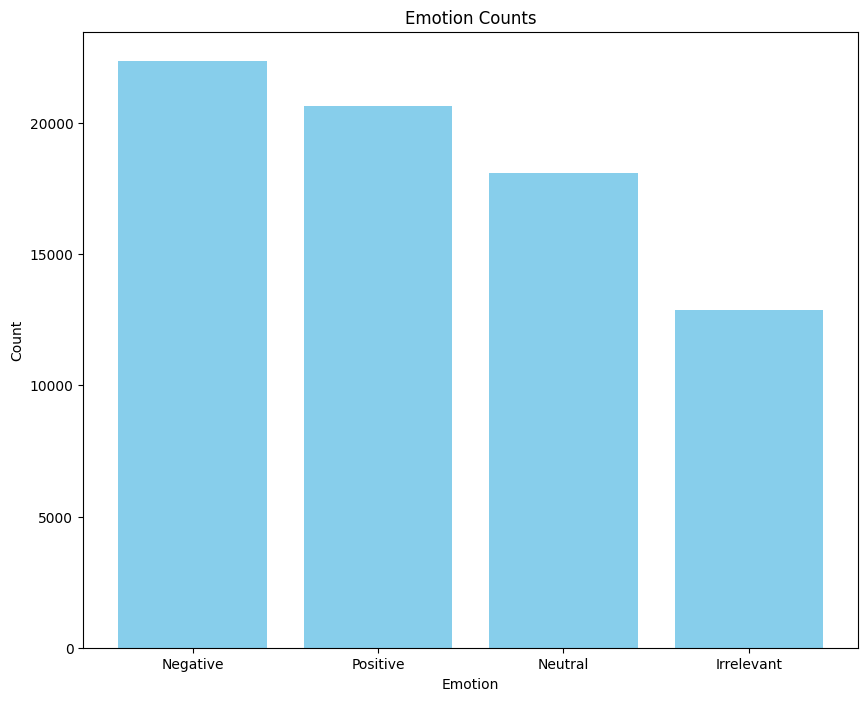

In [10]:
## creating bar chart of different emotion tweet
value_counts = data['remark'].value_counts()
plt.figure(figsize=(10, 8))
plt.bar(value_counts.index, value_counts, color='skyblue')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Count')

In [11]:
y = pd.DataFrame(data['remark'])

y_val = pd.DataFrame(test['remark'])

y.head()

,remark
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive


In [12]:
print(y.shape , data.shape)

(73996, 1) (73996, 2)


In [13]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)
y_val = encoder.transform(y_val)

C:\Users\vansh\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vansh\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [14]:
y

array([3, 3, 3, ..., 3, 3, 3])

## Data Cleaning And Preprocessing

In [15]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordlemmatize=WordNetLemmatizer()

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vansh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
def preprocess(comment):
    # Ensure the comment is a string
    comment = str(comment)
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', comment)
    review = review.lower()
    review = review.split()  # Tokenize the comment
    # Lemmatize each token and remove stopwords
    processed_tokens = [wordlemmatize.lemmatize(word) for word in review if word not in stopwords.words('english')]
    # Return the tokens joined as a single string
    return ' '.join(processed_tokens)

In [19]:
x = data['comment'].apply(preprocess)
x_val = test['comment'].apply(preprocess)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
x_train.shape

(55497,)

In [22]:
print(x_train)

33575                                man got midas flopper
45542    c burst unacceptable demand cc protect access ...
43993      pubg control think best finger control beginner
20669    apt movie art seen one unk artist stuff amazin...
35004    microsoft win five year deal coca cola supply ...
                               ...                        
37541                                                     
6332                                  even going show loss
55392                                fuck call duty update
864      get feed dog way mac get outta dnd watch toget...
15956                                welcome international
Name: comment, Length: 55497, dtype: object


In [23]:
# Initialize TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000, ngram_range=(1,2))

# Fit and transform the training data; transform the test and validation data
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf  = tfidf.transform(x_test)
X_val_tfidf   = tfidf.transform(x_val)

In [24]:
tfidf.vocabulary_

{'man': 2159,
 'got': 1549,
 'demand': 861,
 'cc': 507,
 'protect': 2770,
 'access': 15,
 'communication': 657,
 'service': 3128,
 'bit': 333,
 'ly': 2134,
 'bit ly': 334,
 'pubg': 2782,
 'control': 711,
 'think': 3521,
 'best': 306,
 'finger': 1255,
 'movie': 2298,
 'art': 183,
 'seen': 3109,
 'one': 2459,
 'unk': 3714,
 'artist': 186,
 'stuff': 3386,
 'amazing': 102,
 'lol': 2088,
 'started': 3323,
 'really': 2869,
 'hyped': 1761,
 'cyberpunk': 801,
 'microsoft': 2228,
 'win': 3884,
 'five': 1270,
 'year': 3966,
 'deal': 835,
 'supply': 3417,
 'cloud': 594,
 'technology': 3477,
 'business': 443,
 'software': 3242,
 'com': 615,
 'http': 1745,
 'co': 600,
 'com microsoft': 628,
 'http co': 1746,
 'johnson': 1886,
 'halt': 1628,
 'talc': 3447,
 'baby': 234,
 'powder': 2712,
 'tinyurl': 3566,
 'johnson johnson': 1892,
 'johnson halt': 1889,
 'talc baby': 3448,
 'baby powder': 235,
 'tinyurl com': 3567,
 'spent': 3292,
 'hour': 1738,
 'last': 1967,
 'month': 2282,
 'trying': 3643,
 'pre':

In [25]:
print(X_train_tfidf.shape) 
print(y_train.shape)

(55497, 4000)
(55497,)


In [27]:
from sklearn.metrics import accuracy_score, classification_report

### model training

In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on test data and evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6693334774852695

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.56      3348
           1       0.70      0.77      0.73      5477
           2       0.67      0.60      0.64      4528
           3       0.63      0.75      0.69      5146

    accuracy                           0.67     18499
   macro avg       0.67      0.65      0.65     18499
weighted avg       0.67      0.67      0.66     18499



In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=6, n_estimators=100)

# Fit the model on the training data (features and labels)
xgb_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6379263743986161

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.36      0.48      3348
           1       0.57      0.85      0.68      5477
           2       0.71      0.55      0.62      4528
           3       0.65      0.68      0.67      5146

    accuracy                           0.64     18499
   macro avg       0.67      0.61      0.61     18499
weighted avg       0.66      0.64      0.63     18499



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Fit the model on the training data
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6120871398453971

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.30      0.42      3348
           1       0.59      0.79      0.68      5477
           2       0.65      0.51      0.57      4528
           3       0.59      0.71      0.65      5146

    accuracy                           0.61     18499
   macro avg       0.63      0.58      0.58     18499
weighted avg       0.63      0.61      0.60     18499



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8755608411265474

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      3348
           1       0.88      0.91      0.90      5477
           2       0.91      0.85      0.88      4528
           3       0.81      0.92      0.86      5146

    accuracy                           0.88     18499
   macro avg       0.89      0.87      0.87     18499
weighted avg       0.88      0.88      0.88     18499



In [31]:
print(y_val.shape , X_val_tfidf.shape)

(1000,) (1000, 4000)


In [34]:
y_pred_val = rf_model.predict(X_val_tfidf)

print(y_pred_val.shape)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)

(1000,)
Accuracy: 0.928


In [35]:
report = classification_report(y_pred_val,y_val)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       155
           1       0.95      0.94      0.94       269
           2       0.93      0.91      0.92       293
           3       0.94      0.92      0.93       283

    accuracy                           0.93      1000
   macro avg       0.92      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

